In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results_file = 'results/results_2024_03_22_09_40.csv'
#results_file = 'results/results_2024_03_17_15_50.csv' #ten ostatnio testowany
#results_file = 'results/results_2024_03_17_14_21.csv'
# results_file = 'results/results_2024_03_17_14_21.csv'  # wyniki dla wszystkich ....

df = pd.read_csv(results_file)
# df.loc[df.model_name=='LogisticRegression', 'model_name'] += "_"+df[df.model_name=='LogisticRegression'].param_model__solver
df.loc[df.model_name=='RandomForestClassifier', 'model_name'] += "_"+df[df.model_name=='RandomForestClassifier'].param_model__criterion	
#df.loc[df.model_name=='SVC', 'model_name'] += "_"+df[df.model_name=='SVC'].param_model__kernel

best_models_df = df[df.rank_test_score==1]
best_models_df = best_models_df.dropna(subset=['true_negatives'])
targets = df.target.unique()

<Axes: >

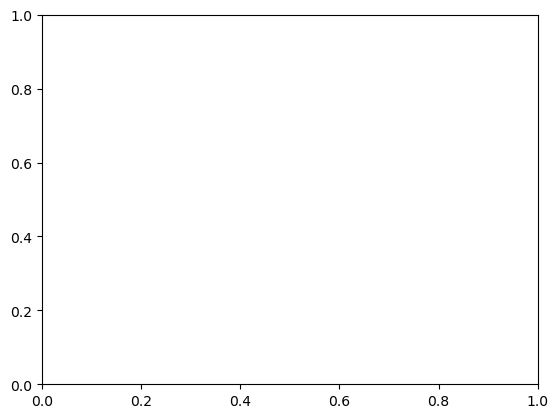

In [40]:
df_plot = (df[df.model_name=='RandomForestClassifier'][[
    'param_model__max_features',
    'param_model__n_estimators',
    'mean_test_score',
    'target'
]])
sns.scatterplot(data=df_plot, x='param_model__n_estimators', y='mean_test_score', hue='target')

# Confusion Matrix

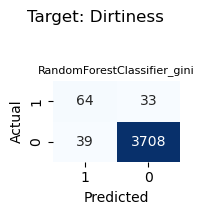

In [41]:
def plot_conf_matrix_for_targets(best_models_df, targets):
    for target in targets:
        best_models_target_df = best_models_df[best_models_df['target'] == target]
        n_models = len(best_models_target_df)
        
        fig, axes = plt.subplots(nrows=1, ncols=n_models, figsize=(n_models*2, 2))
        
        if n_models == 1:
            axes = [axes]  # Ensure axes is iterable for a single subplot
        
        for ax, (_, row) in zip(axes, best_models_target_df.iterrows()):
            conf_matrix = pd.DataFrame({
                '1': [row['true_positives'], row['false_positives']],
                '0': [row['false_negatives'], row['true_negatives']]
            }, index=['1', '0'])
            
            sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues", cbar=False, ax=ax)
            ax.set_title(row['model_name'], fontsize=8)
        for ax in axes[1:]:
            ax.set_yticks([])
        axes[0].set_ylabel('Actual')
        plt.xlabel('Predicted')
        plt.suptitle(f'Target: {target}', y=1.05)  # Adjust y for title positioning
        plt.tight_layout()
        plt.show()

        
plot_conf_matrix_for_targets(best_models_df, targets)

# Plot Metrics

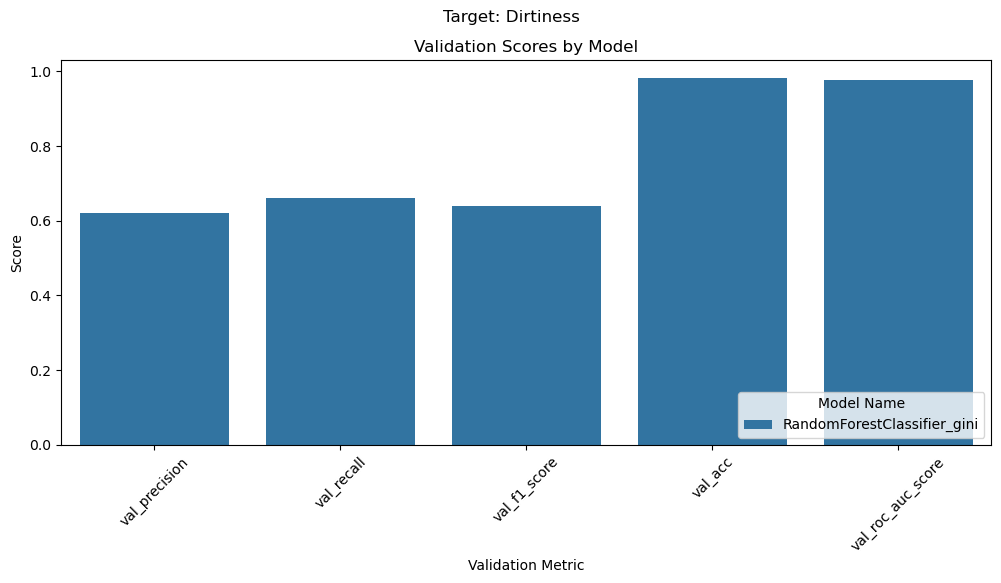

In [42]:
def plot_metrics(target):
    # Melting the DataFrame to have a long format suitable for sns.barplot with hue
    df = best_models_df[best_models_df.target==target]
    df_long = (
        df[
            ['model_name','val_precision','val_recall','val_f1_score', 'val_acc','val_roc_auc_score']]
            .melt(id_vars=['model_name'], var_name='Metric', value_name='Score')
    )
    # Plotting validation scores by model_name with different hues
    plt.figure(figsize=(12, 5))
    sns.barplot(data=df_long, x='Metric', y='Score', hue='model_name')
    plt.suptitle(f"Target: {target}")
    plt.title(f'Validation Scores by Model')
    plt.xticks(rotation=45)
    plt.ylabel('Score')
    plt.xlabel('Validation Metric')
    plt.legend(title='Model Name', loc='lower right')
    plt.show()
    
for target in targets:
    plot_metrics(target=target)

In [4]:
df[
    (df.model_name=='RandomForestClassifier') & 
    (df.target=='Dirtiness')
]

,false_negatives,false_positives,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,model_name,n_iter,param_model,param_model__n_estimators,...,std_test_score,std_train_score,target,true_negatives,true_positives,val_acc,val_f1_score,val_precision,val_recall,val_roc_auc_score
40,2.0,9.0,17.341029,0.207143,0.997900,1.0,RandomForestClassifier,10,RandomForestClassifier(random_state=7),140,...,0.000086,0.0,Dirtiness,3738.0,95.0,0.997138,0.945274,0.913462,0.979381,0.998139
41,NaN,NaN,17.346479,0.204084,0.997900,1.0,RandomForestClassifier,10,RandomForestClassifier(random_state=7),138,...,0.000084,0.0,Dirtiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,18.509071,0.221758,0.997896,1.0,RandomForestClassifier,10,RandomForestClassifier(random_state=7),149,...,0.000099,0.0,Dirtiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,NaN,NaN,15.661998,0.189481,0.997896,1.0,RandomForestClassifier,10,RandomForestClassifier(random_state=7),126,...,0.000094,0.0,Dirtiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,NaN,NaN,15.755445,0.202458,0.997893,1.0,RandomForestClassifier,10,RandomForestClassifier(random_state=7),136,...,0.000094,0.0,Dirtiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,13.949044,0.166887,0.997881,1.0,RandomForestClassifier,10,RandomForestClassifier(random_state=7),112,...,0.000095,0.0,Dirtiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,13.050836,0.158234,0.997871,1.0,RandomForestClassifier,10,RandomForestClassifier(random_state=7),104,...,0.000100,0.0,Dirtiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,NaN,NaN,12.231852,0.145611,0.997864,1.0,RandomForestClassifier,10,RandomForestClassifier(random_state=7),98,...,0.000099,0.0,Dirtiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,11.834274,0.150569,0.997859,1.0,RandomForestClassifier,10,RandomForestClassifier(random_state=7),95,...,0.000091,0.0,Dirtiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,8.832904,0.108011,0.997812,1.0,RandomForestClassifier,10,RandomForestClassifier(random_state=7),69,...,0.000119,0.0,Dirtiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN
